In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [112]:
diabetes_dataframe = pd.read_csv('./Diabetes dataset/Clean_diabetes_dataset.csv')
diabetes_dataframe.head()


,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148,72,35,0,33.6,0.627,50,1
1,1,1,85,66,29,0,26.6,0.351,31,0
2,2,8,183,64,0,0,23.3,0.672,32,1
3,3,1,89,66,23,94,28.1,0.167,21,0
4,5,5,116,74,0,0,25.6,0.201,30,0


In [113]:
# checking co-relationn 
corr_matrix = diabetes_dataframe.corr()
corr_matrix

,Unnamed: 0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Unnamed: 0,1.000000,-0.036976,0.015439,0.028201,0.035387,0.033558,0.038722,-0.011275,0.019538,-0.028682
Pregnancies,-0.036976,1.000000,0.142093,0.210666,-0.094425,-0.114510,0.036958,0.009289,0.567438,0.227987
Glucose,0.015439,0.142093,1.000000,0.238754,-0.004609,0.248225,0.192504,0.066530,0.286682,0.492740
BloodPressure,0.028201,0.210666,0.238754,1.000000,0.037388,-0.041513,0.303301,0.024290,0.354036,0.183298
SkinThickness,0.035387,-0.094425,-0.004609,0.037388,1.000000,0.487566,0.390340,0.148486,-0.143376,0.030676
Insulin,0.033558,-0.114510,0.248225,-0.041513,0.487566,1.000000,0.188635,0.213191,-0.089535,0.097746
BMI,0.038722,0.036958,0.192504,0.303301,0.390340,0.188635,1.000000,0.144757,0.063370,0.269371
DiabetesPedigreeFunction,-0.011275,0.009289,0.066530,0.024290,0.148486,0.213191,0.144757,1.000000,0.030081,0.179072
Age,0.019538,0.567438,0.286682,0.354036,-0.143376,-0.089535,0.063370,0.030081,1.000000,0.263344
Outcome,-0.028682,0.227987,0.492740,0.183298,0.030676,0.097746,0.269371,0.179072,0.263344,1.000000


In [114]:
corr_matrix['Outcome']*100

Unnamed: 0                   -2.868235
Pregnancies                  22.798663
Glucose                      49.274005
BloodPressure                18.329784
SkinThickness                 3.067563
Insulin                       9.774559
BMI                          26.937130
DiabetesPedigreeFunction     17.907250
Age                          26.334387
Outcome                     100.000000
Name: Outcome, dtype: float64

In [115]:
diabetes_dataframe.drop(columns = ['Unnamed: 0','SkinThickness','Insulin','DiabetesPedigreeFunction'], inplace=True)

In [116]:
diabetes_dataframe.head(10)

,Pregnancies,Glucose,BloodPressure,BMI,Age,Outcome
0,6,148,72,33.6,50,1
1,1,85,66,26.6,31,0
2,8,183,64,23.3,32,1
3,1,89,66,28.1,21,0
4,5,116,74,25.6,30,0
5,3,78,50,31.0,26,1
6,4,110,92,37.6,30,0
7,10,168,74,38.0,34,1
8,5,166,72,25.8,51,1
9,0,118,84,45.8,31,1


array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>],
       [<Axes: title={'center': 'BloodPressure'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

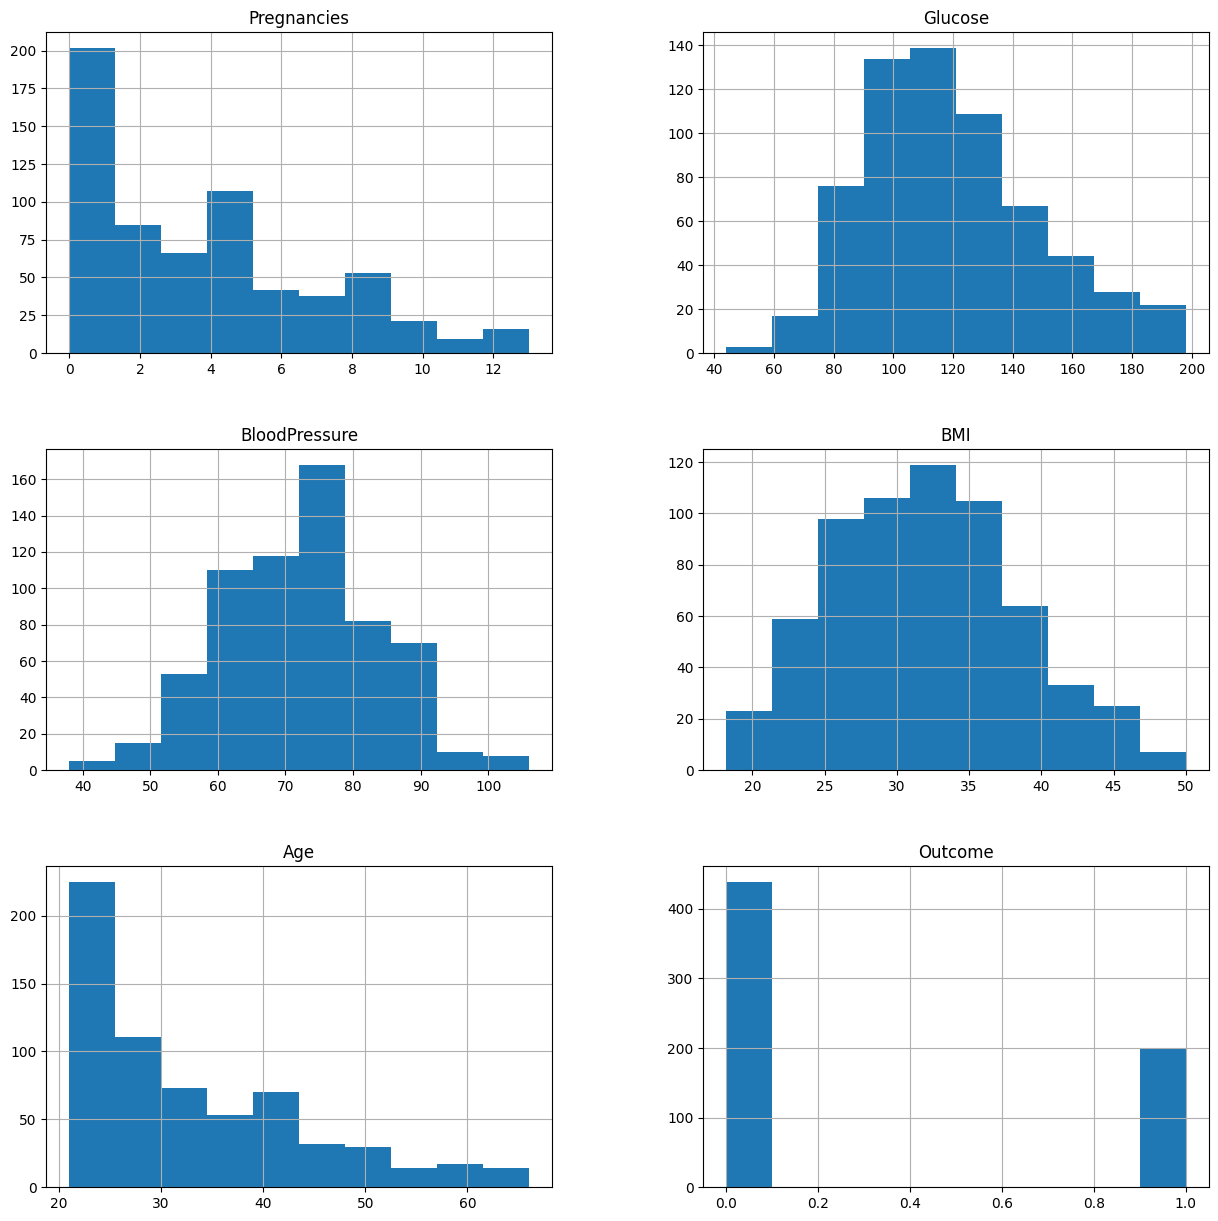

In [117]:
diabetes_dataframe.hist(figsize=(15,15))

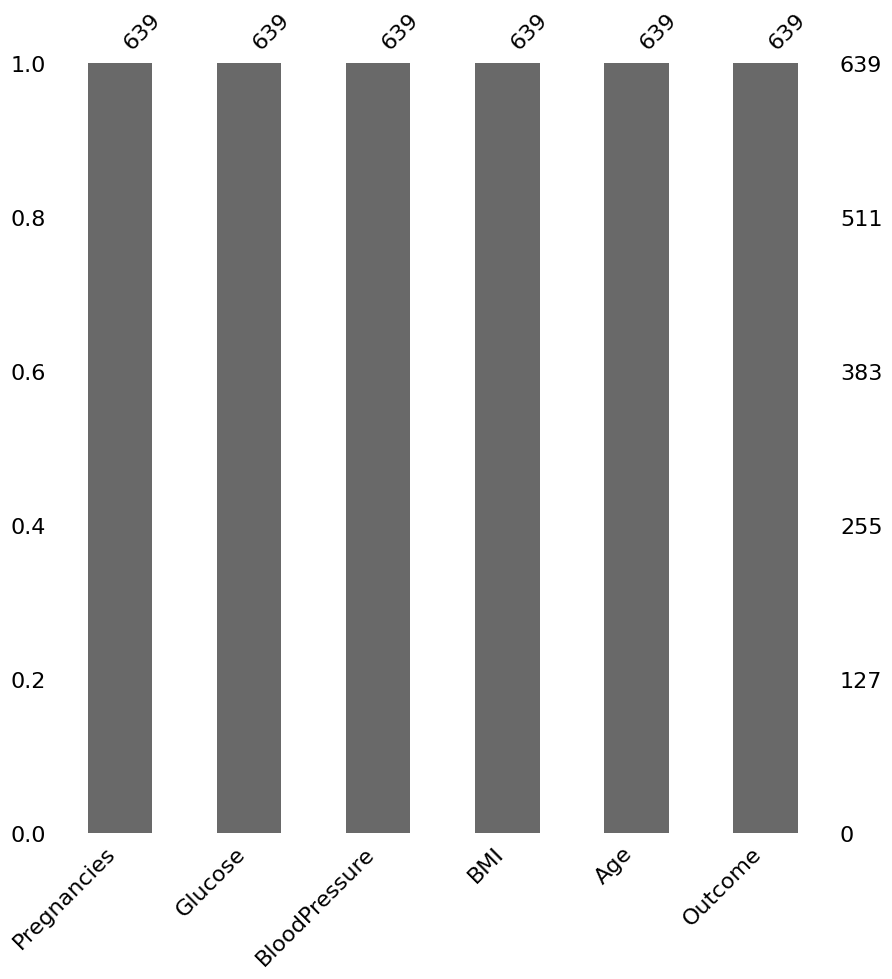

In [118]:
import missingno as msno
p = msno.bar(diabetes_dataframe, figsize=(10,10))

<Axes: >

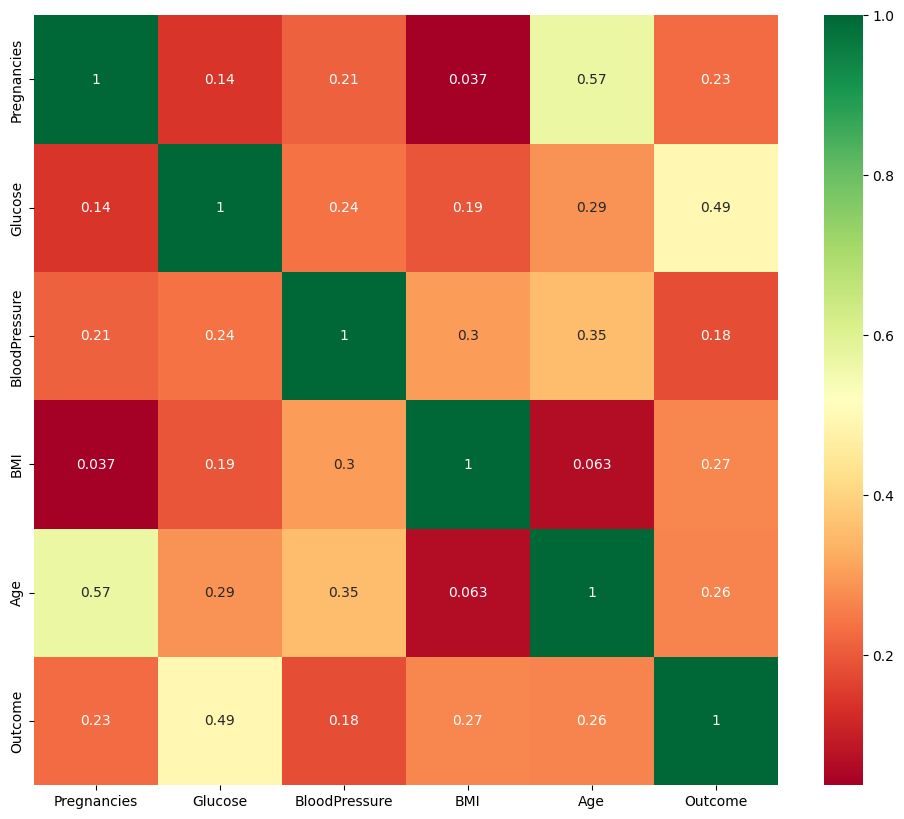

In [119]:
plt.figure(figsize=(12,10))
sns.heatmap(diabetes_dataframe.corr(), annot=True, cmap='RdYlGn')

In [120]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
X = pd.DataFrame(std_scale.fit_transform(diabetes_dataframe.drop(['Outcome'], axis=1)), columns=['Pregnancies','Glucose','BloodPressure','BMI','Age'])
X.head(5)

,Pregnancies,Glucose,BloodPressure,BMI,Age
0,0.673824,0.991351,-0.010626,0.247974,1.561132
1,-0.860651,-1.170674,-0.539736,-0.840853,-0.154912
2,1.287615,2.192476,-0.716106,-1.354158,-0.064594
3,-0.860651,-1.033403,-0.539736,-0.607533,-1.058093
4,0.366929,-0.106820,0.165744,-0.996400,-0.245230


In [121]:
Y = diabetes_dataframe.Outcome
Y.head(5)

0    1
1    0
2    1
3    0
4    0
Name: Outcome, dtype: int64

In [122]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2, random_state=42, stratify=Y)

In [123]:
len(X_train) #511
len(X_test) #128

128

In [124]:
from sklearn.neighbors import KNeighborsClassifier
n_neighbors = [5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100]
Weights= ['uniform', 'distance']
Algorithm = ['auto', 'ball_tree', 'kd_tree']

Score = {}
for n in n_neighbors:
    for a in Algorithm:
        for w in Weights:
            knn = KNeighborsClassifier(n_neighbors=n,algorithm=a, weights=w)
            knn.fit(X_train,Y_train)
            acc  = knn.score(X_test,Y_test)*100
            Score[n, a, w] = acc
    
max(Score.values())

tunedVal = max(Score,key=Score.get)
tunedVal
# list(my_dict.values()).index(100)
# knn.fit(X_train,Y_train)
# knn.score(X_test,Y_test)*100
     
    

(20, 'auto', 'uniform')

In [125]:
knn = KNeighborsClassifier(n_neighbors=20,algorithm='auto', weights='uniform')
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)*100


76.5625

In [126]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
knn_par = {
    "n_neighbors" : range(1,30,2),
    "weights" : ['uniform', 'distance'],
    "algorithm" : ['auto', 'ball_tree', 'kd_tree'],
    "metric"    : ["euclidean", "manhattan", "minkowski"],
    "leaf_size" : range(1,50,5)
}

knn = KNeighborsClassifier()
#grid search
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=1)
grid_search = GridSearchCV(estimator=knn, param_grid=knn_par, n_jobs=1, cv=cv, scoring='accuracy', error_score=0)
grid_results = grid_search.fit(X_train,Y_train)

#best model
final_model = knn.set_params(**grid_results.best_params_)
final_model.fit(X_train,Y_train)
y_pre = final_model.predict(X_test)

# results
print(grid_results.best_params_)

{'algorithm': 'auto', 'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 23, 'weights': 'uniform'}


In [127]:
knn = KNeighborsClassifier(n_neighbors=23,algorithm='auto', weights='uniform',leaf_size=1, metric='euclidean',)
knn.fit(X_train,Y_train)
knn.score(X_test,Y_test)*100

75.78125